# TASK - 11: Build a model to demonstrate KNN Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
# print(iris.DESCR)    --> Detailed Description; Look Exp-10 for more details 

In [4]:
df= pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']= iris.target

In [5]:
df[df.target==0].head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [6]:
df[df.target==1].head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1


In [7]:
df[df.target==2].head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2


In [8]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])

In [9]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


In [10]:
df[48:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor


In [11]:
df[98:102]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
98,5.1,2.5,3.0,1.1,1,versicolor
99,5.7,2.8,4.1,1.3,1,versicolor
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica


In [12]:
df0= df[0:49]          # Setosa
df1= df[50:100]       # Versicolor
df2= df[101:150]     # Virginica

# Sepal Length vs Sepal Width (Setosa vs Versicolor)

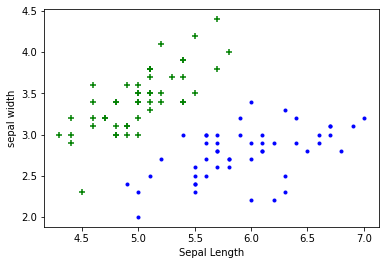

In [13]:
plt.xlabel('Sepal Length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color="blue",marker='.')
plt.show()

# Petal Length vs Pepal Width (Setosa vs Versicolor)

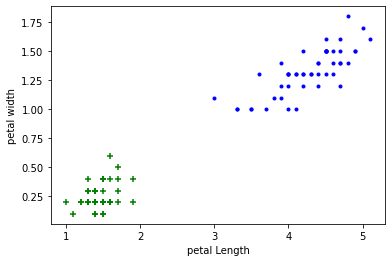

In [14]:
plt.xlabel('petal Length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color="blue",marker='.')
plt.show()

In [15]:
X= iris.data      #  df.iloc[:,0:-2]   --->  X
y= iris.target   #  df.target    --->  y

In [16]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y, test_size=0.3, random_state=1)    # Total 150 rows are splitted into (Train - 105 & Test - 45)

# K Neighrest Neighbour Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)

In [18]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [19]:
model.score(X_test, y_test)

0.9777777777777777

In [20]:
X_newtest= [[5.1, 3.5, 1.4, 0.2]]

In [21]:
model.predict(X_newtest)   # or   knn.predict([[4.8,3.0,1.5,0.3]])

array([0])

In [22]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


Text(42.0, 0.5, 'Truth')

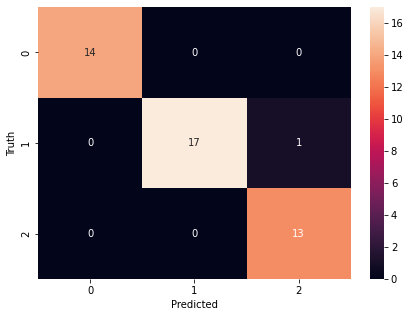

In [23]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')